# RNN 이해 및 실습

## 1. 시계열 데이터

- 예제 시계열 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xarr = np.array([100,200,300,400])
yarr = np.array([1,2,3,4])
cond = ([True,False,True,False])
np.where(cond,xarr,yarr) #cond True->xarr, False ->yarr

array([100,   2, 300,   4])

In [ ]:
np.random.seed(2020)
time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5,
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))


In [ ]:
time_series

array([ 2.00000000e+01,  1.95629520e+01,  1.82709092e+01,  1.61803399e+01,
        1.33826121e+01,  1.00000000e+01,  6.18033989e+00,  2.09056927e+00,
       -2.09056927e+00, -6.18033989e+00, -1.00000000e+01, -1.33826121e+01,
       -1.61803399e+01, -1.82709092e+01, -1.95629520e+01, -6.66393899e+00,
       -1.52209392e+01, -7.04236950e+00, -1.36967643e+01, -6.98788244e+00,
        9.06427746e+00, -3.43320407e+00,  9.29769267e+00,  2.16038789e+01,
        1.62476811e+01,  2.33532841e+01,  1.40664421e+01,  2.53027272e+01,
        2.13879364e+01,  2.90839313e+01,  2.00000000e+01,  1.95629520e+01,
        1.82709092e+01,  1.61803399e+01,  1.33826121e+01,  1.00000000e+01,
        6.18033989e+00,  2.09056927e+00, -2.09056927e+00, -6.18033989e+00,
       -1.00000000e+01, -1.33826121e+01, -1.61803399e+01, -1.82709092e+01,
       -1.95629520e+01, -1.68766917e+01, -6.82506738e+00, -7.15699540e+00,
       -1.23417656e+01, -4.86949247e+00,  2.68404157e-01, -7.92788173e-01,
        9.88983111e+00,  

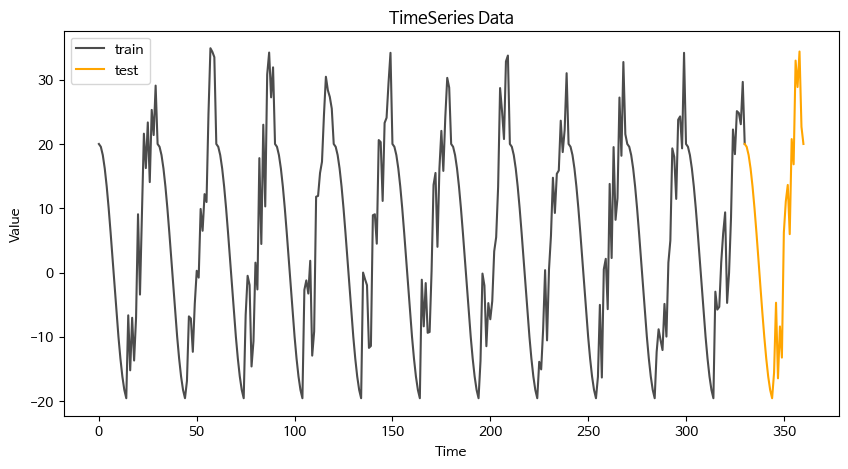

In [ ]:
plt.figure(figsize = (10, 5))
plt.title('TimeSeries Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30 * 11 + 1), time_series[:30 * 11 + 1], color = 'black', alpha = 0.7, label = 'train') # 학습용 데이터
plt.plot(np.arange(30 * 11, 30 * 12 + 1), time_series[30 * 11:], color = 'orange', label = 'test') # 테스트용 데이터
plt.legend()

## 2. 시계열 데이터 전처리 : Sequence를 만들기

In [ ]:
def make_sequence(time_series, n):  #시계열에서 1부터 n번째까지 선택해서 x로 지정, n+1번째값은 y, 이런 식으로 시계열 값을 계속 윈도우 n크기로 슬라이딩
    x_train, y_train = list(), list()

    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break

    return np.array(x_train), np.array(y_train)

n = 15
x_train, y_train = make_sequence(time_series, n)
x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)
print(x_train.shape)
print(y_train.shape)

(346, 15, 1)
(346, 1)


In [ ]:
from sklearn.model_selection import train_test_split

partial_x_train = x_train[:30 * 11]
partial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', partial_x_train.shape, partial_y_train.shape)
print('test:',x_test.shape, y_test.shape)

train: (330, 15, 1) (330, 1)
test: (16, 15, 1) (16, 1)


## 3. sequence 함수 확인하기

In [ ]:
test_arr = np.arange(100)
a, b = make_sequence(test_arr, 15)

for i in range(1, 4):
    print(a[i],'|', b[i])


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] | 16
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] | 17
[ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] | 18


## 4. SimpleRNN 구축

- tanh: Hyperbolic tangent 함수
- -1~1사이의 값, 출력범위가 sigmoid보다 크고, 경사가 큰 구간이 많아 sigmoid보다 빠르게 수렴하여 학습하는 특성
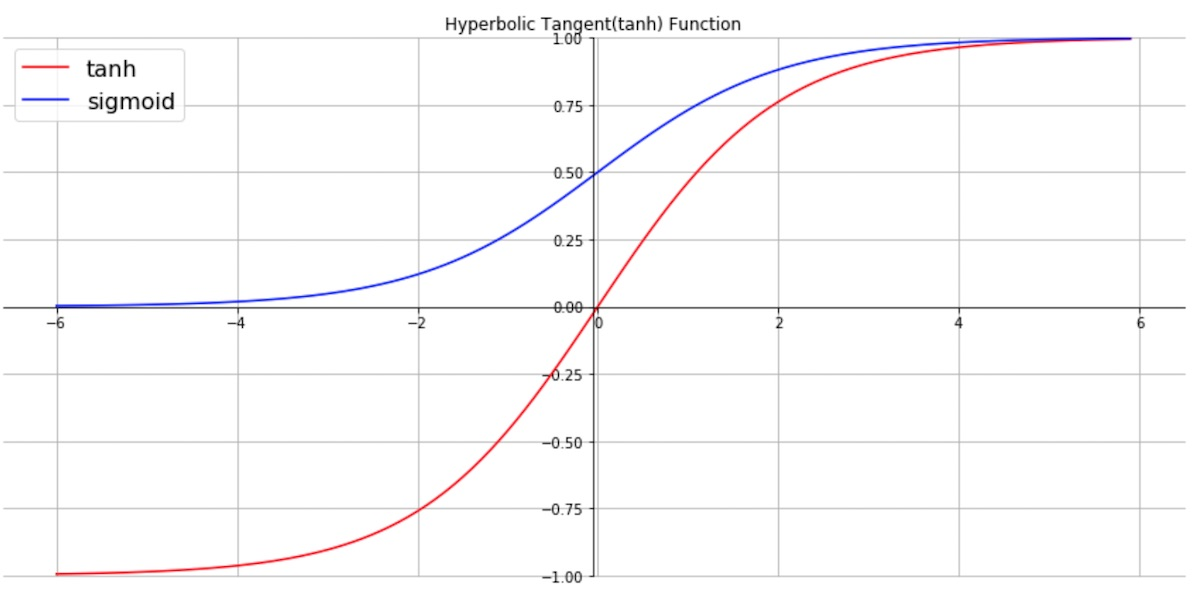

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

model = Sequential()
# SimpleRNN 층을 첫 번째 은닉층인 경우, input_shape를 명시
model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1))) #units: output의 dimension, relu대신 tanh 사용
#model.add(LSTM(units = 32, activation = 'tanh', input_shape = (n, 1)))
#model.add(GRU(units = 32, activation = 'tanh', input_shape = (n, 1)))

#rnn은 이전 단계의 가중치를 사용하며, relu 를 사용하면, 역전파 시 이전 단계의 그라디언트와 같이 사용되면 출력이 발산
model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mse')  #mean squared error
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_31 (SimpleRNN)   (None, 32)                1088      
                                                                 
 dense_54 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 30, batch_size = 1)

Epoch 1/30
346/346 [==============================] - 2s 4ms/step - loss: 150.2134
Epoch 2/30
346/346 [==============================] - 1s 4ms/step - loss: 82.6637
Epoch 3/30
346/346 [==============================] - 1s 4ms/step - loss: 64.3471
Epoch 4/30
346/346 [==============================] - 2s 6ms/step - loss: 55.3627
Epoch 5/30
346/346 [==============================] - 2s 5ms/step - loss: 49.8713
Epoch 6/30
346/346 [==============================] - 1s 4ms/step - loss: 43.6613
Epoch 7/30
346/346 [==============================] - 1s 3ms/step - loss: 37.6229
Epoch 8/30
346/346 [==============================] - 1s 4ms/step - loss: 33.2076
Epoch 9/30
346/346 [==============================] - 1s 4ms/step - loss: 31.5034
Epoch 10/30
346/346 [==============================] - 1s 4ms/step - loss: 29.5901
Epoch 11/30
346/346 [==============================] - 1s 4ms/step - loss: 29.1475
Epoch 12/30
346/346 [==============================] - 1s 4ms/step - loss: 27.7067
Epoch 13/30


- pykrx에서 삼성전자 주가를 2022.1~6 받아보세요.
- 종가를 사용해서, time step을 5로 지정하셔서 SimpleRNN을 적용해보세요

In [ ]:
!pip install pykrx

from pykrx import stock
df = stock.get_market_ohlcv_by_date(fromdate="20220101", todate="20220630", ticker="005930")

In [ ]:
#pykrx에서 삼성전자 주가를 2022.1~6 받아보세요.
#종가를 사용해서, time step을 5로 지정하셔서 SimpleRNN을 적용해보세요

from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential
arr = df.종가.values
x, y = make_sequence(arr, 3)
x.reshape(-1, 3, 1)
y.reshape(-1, 1)

x_tr = x[0:100]
x_te = x[100:]
y_tr = y[0:100]
y_te = y[100:]

model = Sequential()
# SimpleRNN 층을 첫 번째 은닉층인 경우, input_shape를 명시
model.add(SimpleRNN(units = 8, activation = 'tanh', input_shape = (3, 1)))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_tr, y_tr, epochs = 5, validation_split=0.1)

Epoch 1/5
3/3 [==============================] - 3s 156ms/step - loss: 5046031872.0000 - val_loss: 4487174656.0000
Epoch 2/5
3/3 [==============================] - 0s 21ms/step - loss: 5046027264.0000 - val_loss: 4487170560.0000
Epoch 3/5
3/3 [==============================] - 0s 20ms/step - loss: 5046023680.0000 - val_loss: 4487166976.0000
Epoch 4/5
3/3 [==============================] - 0s 21ms/step - loss: 5046020096.0000 - val_loss: 4487162880.0000
Epoch 5/5
3/3 [==============================] - 0s 27ms/step - loss: 5046015488.0000 - val_loss: 4487159808.0000


- 구글트렌드에서 검색어를 사용하셔서 검색량 통계를 다운로드 받으세요
- csv를 읽으셔서, 검색량에 대한 시퀀스(x,y)를 만들어주세요
- SimpleRNN으로 피팅해보세요.


In [ ]:
import pandas as pd
trend = pd.read_csv("multiTimeline.csv")
data = trend.search.values / 100

n=3
x, y = make_sequence( data, n )

x2 = x.reshape(-1, 3, 1)
y2 = y.reshape(-1, 1)


x2_train = x2[0:50]
x2_test = x2[50:]
y2_train = y2[0:50]
y2_test = y2[50:]

model = Sequential()
model.add(SimpleRNN(units = 8, activation = 'tanh', input_shape = (n, 1))) #units: output의 dimension, relu대신 tanh 사용
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')  #mean squared error
model.fit(x2_train, y2_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 2s 14ms/step - loss: 7.0719e-05
Epoch 2/10
2/2 [==============================] - 0s 12ms/step - loss: 3.2717e-05
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 4.6288e-05
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 2.7670e-05
Epoch 5/10
2/2 [==============================] - 0s 10ms/step - loss: 2.8130e-05
Epoch 6/10
2/2 [==============================] - 0s 11ms/step - loss: 3.5280e-05
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 2.9005e-05
Epoch 8/10
2/2 [==============================] - 0s 11ms/step - loss: 2.5928e-05
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 2.9418e-05
Epoch 10/10
2/2 [==============================] - 0s 11ms/step - loss: 2.8817e-05


In [ ]:
from sklearn.linear_model import LinearRegression

xl_train = x[0:50]
xl_test = x[50:]
yl_train = y[0:50]
yl_test = y[50:]

lr = LinearRegression().fit(xl_train, yl_train)
lr.score(xl_test, yl_test)

-0.48912798794879264

In [ ]:
#!pip install pykrx
from pykrx import stock
price = stock.get_market_ohlcv_by_date(fromdate="20220101", todate="20220630", ticker="005930")
price2 = price["종가"].values
x_train, y_train = make_sequence(price2, 5)
x_train = x_train.reshape(-1, 5, 1)
y_train = y_train.reshape(-1, 1)
partial_x_train = x_train[:100]
partial_y_train = y_train[:100]
x_test = x_train[100:]
y_test = y_train[100:]

In [ ]:
n=5
model = Sequential()
#model.add(SimpleRNN(units = 32, activation = 'tanh', input_shape = (n, 1))) #units: output의 dimension, relu대신 tanh 사용
#model.add(LSTM(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(GRU(units = 32, activation = 'tanh', input_shape = (n, 1)))
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')  #mean squared error
model.fit(partial_x_train, partial_y_train, epochs=20)
model.evaluate( x_test, y_test)


Epoch 1/20
4/4 [==============================] - 2s 6ms/step - loss: 4955016192.0000
Epoch 2/20
4/4 [==============================] - 0s 7ms/step - loss: 4955001344.0000
Epoch 3/20
4/4 [==============================] - 0s 7ms/step - loss: 4954985984.0000
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 4954970624.0000
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 4954955776.0000
Epoch 6/20
4/4 [==============================] - 0s 9ms/step - loss: 4954939904.0000
Epoch 7/20
4/4 [==============================] - 0s 7ms/step - loss: 4954925056.0000
Epoch 8/20
4/4 [==============================] - 0s 8ms/step - loss: 4954910208.0000
Epoch 9/20
4/4 [==============================] - 0s 7ms/step - loss: 4954894336.0000
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 4954879488.0000
Epoch 11/20
4/4 [==============================] - 0s 7ms/step - loss: 4954864128.0000
Epoch 12/20
4/4 [==============================] - 0

3591691776.0

## 5. 예측 VS Actual


In [ ]:
print( np.sqrt( np.mean((model.predict(x_test ).reshape(16,) - y_test.reshape(16,))**2 )))


1/1 [==============================] - 0s 403ms/step
59930.72519291803


1/1 [==============================] - 0s 22ms/step


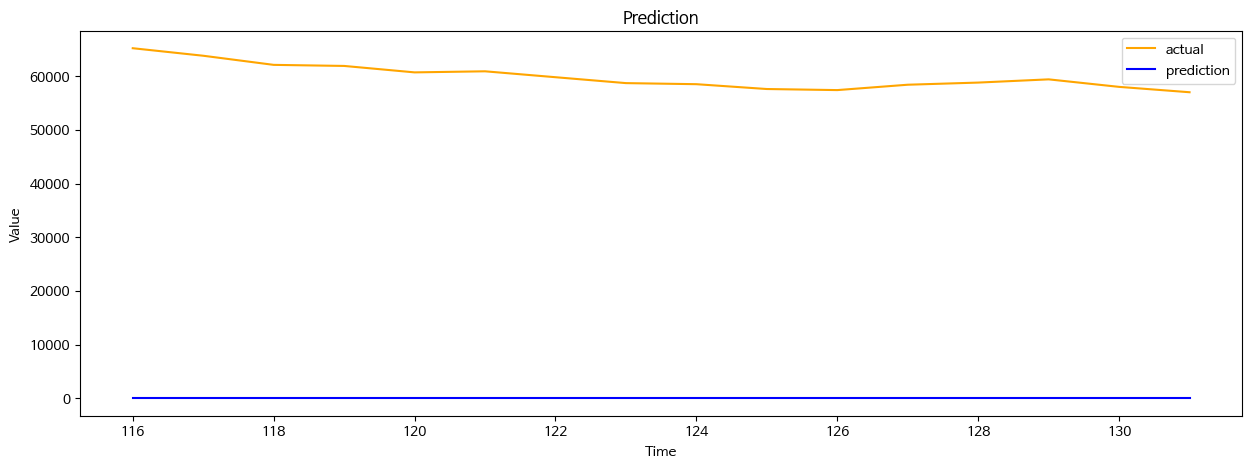

In [ ]:
pred = model.predict(x_test)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.title('Prediction')
plt.xlabel('Time'); plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='actual')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

## 6. 두번째 RNN 실습




- RNN 입력 x 데이터의 shape: (n_sample, time step, x vector의 크기)
 - n_sample: sample의 수
 - time step: t-n 에서 n이 몇인가를 묻는 것
 - x vector의 크기: 현재는 1개, 추후 여러 값이 입력, 여러값이 출력될 수 있음. x변수의 값 1개의 크기임
 - xvector의 크기 = yvector의 크기와 동일

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

s = np.sin(2 * np.pi * 0.125 * np.linspace(0, 20, 50))
timestep =3 # t-3, t-2, t-1 데이터를 이용하여 t 시점의 값을 예측
xs, ys = [], []

for i in range(timestep, len(s)):
    xs.append(np.array([s[i-j] for j in range(timestep, 0, -1)]))
    ys.append(s[i])
xs, ys = np.array(xs).reshape(len(xs), 3, 1), np.array(ys).reshape(len(ys), 1)
print(xs.shape)

(47, 3, 1)


In [ ]:
## rnn 적용.
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

## simple RNN model
np.random.seed(0)# seed 고정
model0 = Sequential()
model0.add( SimpleRNN(units=1, input_shape=(3, 1)))
model0.compile(loss='mse', optimizer='sgd')
history0 = model0.fit(xs, ys, epochs=150, verbose=0)

In [ ]:
model1 = Sequential()
model1.add( SimpleRNN(units=10, input_shape=(3, 1)) )
model1.add( Dense(10, activation='linear') )
model1.add( Dense(1, activation='linear') )
model1.compile(loss='mse', optimizer='sgd')
history1 = model1.fit(xs, ys, epochs=150, verbose=0)

2/2 [==============================] - 0s 8ms/step


<ipython-input-150-833e9a3d0856>:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(model0.predict(xs), 'bo-', marker='o', label='model0')


2/2 [==============================] - 0s 5ms/step


<ipython-input-150-833e9a3d0856>:5: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "go-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(model1.predict(xs), 'go-', marker='o', label='model1')


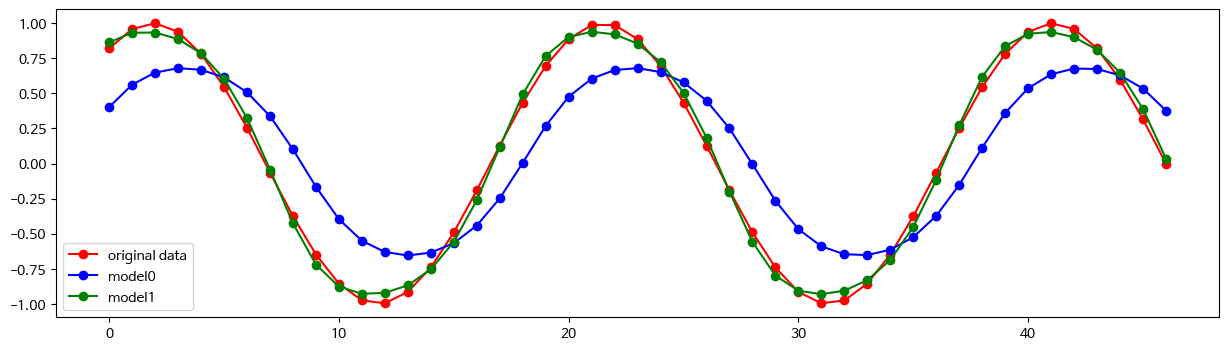

In [ ]:
## plot
fig = plt.figure(figsize=(15, 4))
plt.plot(s[3:], 'ro-', label='original data') # 원래 plot, 앞의 3칸의 경우,
plt.plot(model0.predict(xs), 'bo-', marker='o', label='model0')
plt.plot(model1.predict(xs), 'go-', marker='o', label='model1')
plt.legend()

plt.savefig('simple_rnn.svg')
plt.show()

# 7. 주가+RNN

##1. 시계열 분석
-정상 프로세스 VS 비정상 프로세스
 - 정상 프로세스(Stationary Process): 시계열 자료의 평균과 분산이 시간에 관계없이 일정한 겨우
 - 비정상 프로세스(Non-stationary Process): 시계열 자료의 평균과 분산이 일정하지 않은 경우

- 정상 VS 비정상 비교를 위해서 ACF를 확인
 - Autocorrelation Function으로 특정 패턴이 없으면 정상 프로세스로 고려
 - ACF: 자기 상관 함수, k시간 단위로 구분된 시계열의 관측치 사이의 상관계수 함수, k가 커지면 ACF는 0에 가까워짐
 - t시점의 y와 t-k시점의 y의 ACF
 - ACF가 패턴이 없거나 갑자기 떨어지는 모습->정상 시계열
 -
 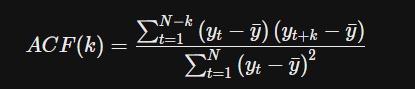
 - PACF(Partial ACF)
  - 부분상관(Partial Corr): 두 확률변수에 의해 다른 변수들에 나타난 상관관계를 설명한 후 남아있는 상관관계
  - PACF는 시계열 관측치 간의 상관관계, k시차에서의 '순수한' 상관관계(두 시점 사이 다른 관측치의 영향력은 제거)
  - t 시점의 y와 t-k 시점의 y의 편자기상관

- AR 모형: 자기 자신을 y로 하고, 시차 p인 이전 시점의 시계열 값들을 x변수로 하는 모형, 시차 p 를 하이퍼파라미터
- MA 모형: 자기 자신이 y이고, 해당 시점과 시차 q인 과거의 white noise error들이 x변수인 모형, 하이퍼파라미터는 시차 q
-  ARMA모형: 자기 자신을 y로 하고, 이전 시점(p)의 시계열과 white noise error들을 x변수로 하는 모형, p,q가 하이퍼파라미터
- ARIMA모형: 위의 세 모형은 정상 프로세스에서의 경우, 비정상 프로세스는 차분을 통해 모형 적용, 차분을 d회 적용한 ARMA모형
 - 차분은 대체로 2회까지, 3회를 넘긴 경우 다른 모형 피팅

- ACF, PACF를 통해서 ARIMA 모형의 p,q를 결정
 - MA(q):
  - ACF: q 시차 이후 0으로 절단
  - PACF: 지수적으로 감소 소멸하는 형태
 - AR(P)
  - ACF: 지수적으로 감소 소멸하는 형태
  - PACF: p 시차 이후 0으로 절단
 - ARMA(p,q)
  - ACF: 시차 (q-p) 이후 부터 소멸
  - PACF: 시차(q-p)이후부터 소멸
  -  p + q < 2, p * q = 0, 대부분은 한 경향을 갖기 때문
- 모형 확인
 - Residuals에 대해서 ACF를 생성
 - 대부분이 영역 안에 들어오고, 40개 중 2-3개 까지는 영역 밖에 있어도 괜찮음


## 1. 시계열 데이터에 대한 RNN 적용

In [ ]:
# 아래의 amzn를
# simpleRNN, LSTM, GRU로 mse 비교
#종가를 사용해서, time step을 5로 지정하셔서 SimpleRNN을 적용해보세요

from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data=pd.read_csv('AMZN.csv', header=0,index_col="Date")

arr = MinMaxScaler().fit_transform(data)[:,3]

x, y = make_sequence(arr, 5)
x.reshape(-1, 5, 1)
y.reshape(-1, 1)

x_tr = x[0:200]
x_te = x[200:]
y_tr = y[0:200]
y_te = y[200:]

model = Sequential()

# SimpleRNN
# LSTM, GRU 변경만 하면 됨.
model.add(SimpleRNN(units = 50, activation = 'tanh', input_shape = (5, 1)))
model.add(Dense(25, activation = 'linear'))
model.add(Dense(10, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_tr, y_tr, epochs = 20, validation_split=0.1)
print("SimpleRNN - ", model.evaluate(x_te, y_te))


model = Sequential()
model.add(LSTM(units = 50, activation = 'tanh', input_shape = (5, 1)))
model.add(Dense(25, activation = 'linear'))
model.add(Dense(10, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_tr, y_tr, epochs = 20, validation_split=0.1)
print("LSTM - ", model.evaluate(x_te, y_te))


model = Sequential()
model.add(GRU(units = 50, activation = 'tanh', input_shape = (5, 1)))
model.add(Dense(25, activation = 'linear'))
model.add(Dense(10, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(x_tr, y_tr, epochs = 20, validation_split=0.1)
print("GRU - ", model.evaluate(x_te, y_te))


Epoch 1/20
6/6 [==============================] - 2s 56ms/step - loss: 0.0316 - val_loss: 0.0301
Epoch 2/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0110 - val_loss: 0.0206
Epoch 3/20
6/6 [==============================] - 0s 11ms/step - loss: 0.0073 - val_loss: 0.0161
Epoch 4/20
6/6 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0128
Epoch 5/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0041 - val_loss: 0.0124
Epoch 6/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0037 - val_loss: 0.0121
Epoch 7/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0092
Epoch 8/20
6/6 [==============================] - 0s 13ms/step - loss: 0.0030 - val_loss: 0.0102
Epoch 9/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0027 - val_loss: 0.0090
Epoch 10/20
6/6 [==============================] - 0s 9ms/step - loss: 0.0026 - val_loss: 0.0084
Epoch 11/20
6/6 [==================

In [ ]:
import pandas as pd
data=pd.read_csv('AMZN.csv', header=0,index_col="Date")
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-04-17 to 2020-04-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1864.800556,1883.242064,1846.651429,1866.393093,1866.393093,4.060800e+06
std,110.513502,116.543016,110.148293,114.338644,114.338644,2.035731e+06
min,1641.510010,1725.000000,1626.030029,1676.609985,1676.609985,8.813000e+05
25%,1778.007507,1793.577515,1762.510040,1783.422516,1783.422516,2.748850e+06
50%,1842.005005,1870.639954,1826.875000,1854.284973,1854.284973,3.410900e+06
75%,1921.224945,1936.729981,1898.567535,1912.812469,1912.812469,4.754375e+06
max,2346.000000,2461.000000,2335.000000,2408.189941,2408.189941,1.556730e+07


In [ ]:
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-17  1872.989990  1876.469971  1860.439941  1864.819946  1864.819946   
2019-04-18  1868.790039  1870.819946  1859.479980  1861.689941  1861.689941   
2019-04-22  1855.400024  1888.420044  1845.640015  1887.310059  1887.310059   
2019-04-23  1891.199951  1929.260010  1889.579956  1923.770020  1923.770020   
2019-04-24  1925.000000  1929.689941  1898.160034  1901.750000  1901.750000   

             Volume  
Date                 
2019-04-17  2893500  
2019-04-18  2749900  
2019-04-22  3373800  
2019-04-23  4640400  
2019-04-24  3675800  


In [ ]:
data.shape

(252, 6)

In [ ]:
# amazon.com의 close 컬럼을 사용하셔서,
# 1 sequence를 만드세요 (make_sequence, time step=....
x_train, y_train = make_sequence( data.Close.values, 3)
x_train = x_train.reshape( -1, 3, 1)
y_train = y_train.reshape( -1, 1)

# 1.5 처음부터225개까지가 train, 226~252까지 test
x_train2 = x_train[ : 225]
y_train2 = y_train[ : 225]
x_test = x_train[ 225: ]
y_test = y_train[ 225: ]

# 2 SimpleRNN을 적용하세요
model2 = Sequential()
model2.add( SimpleRNN(units=1, input_shape=(3, 1)) )
model2.compile(loss='mse', optimizer='adam')
history2 = model2.fit(x_train2, y_train2, epochs=50, verbose=0)

# 3 test셋으로 evaluate 해보세요.
model2.evaluate( x_test, y_test)


1/1 [==============================] - 0s 204ms/step - loss: 3921395.2500


3921395.25

In [ ]:
!pip install -U pykrx

from pykrx import stock

stock1 = stock.get_market_ticker_name("000660")
stock1

df = stock.get_market_ohlcv_by_date("20210104", "20211231", "005930")
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume', "Change"]
df
data=df

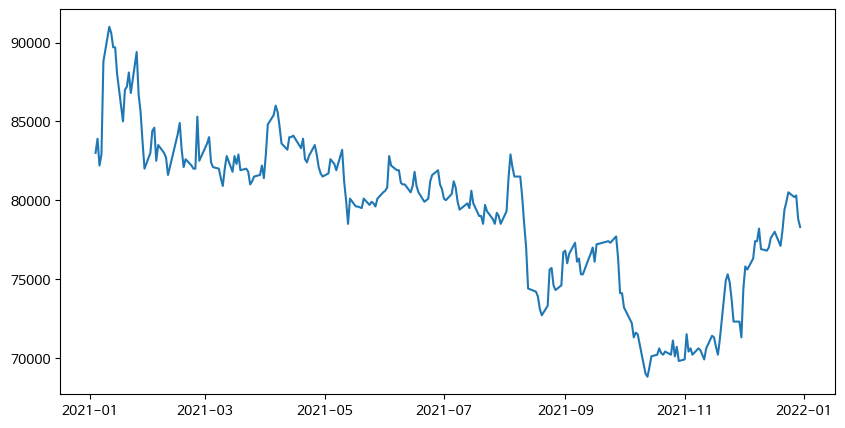

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.show()

- 정상성(Stationarity)
 - RNN이나 좋은 기법이라 하더라도 시계열 자료가 정상성이 결여된 경우 성능이 좋지 않을 수 있음
 - 정상성이란: 시계열 자료가 뚜렷한 트렌드 없이 값의 변동이 시간의 흐름에 따라 일정, stationarity
 - 정상성 여부의 검정: Dickey Fuller의 단위근 검정
  - 귀무가설: 비정상시계열 (단위근 있다)
  - 대립가설: 정상시계열(단위근 없다)

 - 비정상시계열인 경우: 시계열 자료 차분(differencing)하여 정상시계열로 변환 후 피팅

 - 주가: 일반적으로 비정상 시계열, 로그수익율인 경우 정상시계열이 됨
 - 수익율 = 현재 가격/과거 가격
 - 로그수익율: log현재가격-log과거가격 = log(현재가격/과거가격)


In [ ]:
#!pip install statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller    #종가의 정상성 여부 점검
result=adfuller(data['Close'])
print(result) #0.5933이 p-value, 비정상 시계열

(-1.8660739163103446, 0.34818538521662656, 0, 247, {'1%': -3.457105309726321, '5%': -2.873313676101283, '10%': -2.5730443824681606}, 3830.8195835262513)


- acf, pacf
 - acf: 자기상관함수, autocorrelation function, k기간 떨어진 값들의 상관 계수
 - pacf: 편자기상관함수, partial autocorrelation function, 서로 다른 두 지점 사이의 관계를 분석할때, 중간에 있는 값들의 영향을 제외시킨 상관계수

 - p가 증가 시, 지수적 감소 혹은 절단 형태여야 정상성, 둘 중 하나라도 느리게 감소하거나 증가 시 비정상성

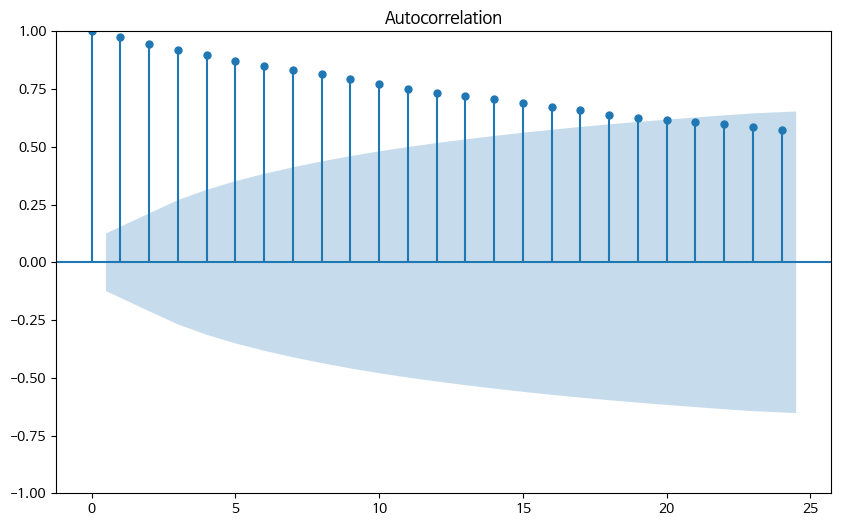

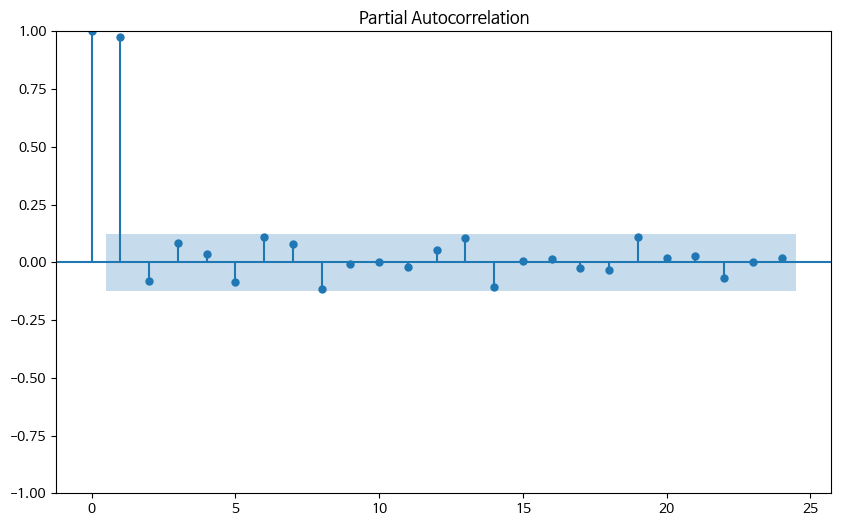

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Close']) #느리게 감소, 비정상시계열
plot_pacf(data['Close'])
plt.show()

In [ ]:
data.diff() #differencing 차이를 구해줌 ->주가가 아닌 경우에 사용

,Open,High,Low,Close,Volume,Change
날짜,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,600.0,-500.0,1400.0,900.0,-3319607.0,-1.384798
2021-01-06,1700.0,600.0,500.0,-1700.0,6753344.0,-3.110559
2021-01-07,-500.0,-300.0,600.0,700.0,-9444371.0,2.877803
2021-01-08,500.0,5800.0,300.0,5900.0,26368665.0,6.265427
...,...,...,...,...,...,...
2021-12-24,400.0,800.0,900.0,600.0,-1491118.0,0.121216
2021-12-27,400.0,-200.0,-400.0,-300.0,-1303012.0,-1.123609
2021-12-28,-400.0,-200.0,-100.0,100.0,7442957.0,0.497359


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


             Open        High         Low       Close      Volume      Change
count  247.000000  247.000000  247.000000  247.000000  247.000000  132.000000
mean    -0.000106   -0.000242   -0.000107   -0.000236   -0.004044         NaN
std      0.015147    0.013912    0.012226    0.013617    0.283487         NaN
min     -0.040052   -0.057402   -0.045330   -0.035591   -0.858579        -inf
25%     -0.007996   -0.007348   -0.006969   -0.007339   -0.185996   -1.102321
50%      0.000000    0.000000   -0.001219   -0.001234    0.002140   -0.090192
75%      0.007371    0.006873    0.005063    0.007221    0.176373    0.692529
max      0.077361    0.072837    0.075398    0.068752    0.833300         inf


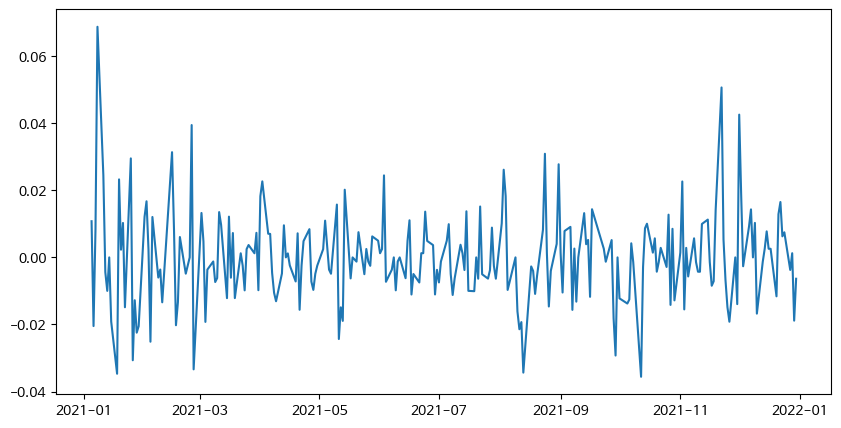

In [ ]:
import numpy as np
datapct=data.pct_change()   #주가인 경우 수익율
logreturn=np.log(1+datapct) #로그수익율
logreturn.head()
print(logreturn.describe())
plt.figure(figsize=(10,5))
plt.plot(logreturn['Close'])
plt.show()

In [ ]:
logreturn.dropna()  #NAN을 제거

,Open,High,Low,Close,Volume,Change
날짜,,,,,,
2021-01-05,0.007380,-0.005942,0.017306,0.010785,-0.089790,-0.822899
2021-01-08,0.006020,0.066615,0.003621,0.068752,0.592082,2.123148
2021-01-11,0.077361,0.072837,0.075398,0.024473,0.425443,-1.055247
2021-01-13,-0.005552,-0.002191,0.014698,-0.009983,-0.299888,0.815336
2021-01-14,-0.012325,-0.013245,-0.004499,0.000000,-0.312294,-inf
...,...,...,...,...,...,...
2021-12-17,-0.021894,-0.006390,-0.007782,0.002567,0.088675,-0.002574
2021-12-22,0.012755,0.013951,0.016635,0.016508,0.182996,0.249477
2021-12-23,0.011342,0.007528,0.006325,0.006277,-0.231009,-0.972020


In [ ]:
from statsmodels.tsa.stattools import adfuller
logreturn=logreturn.dropna()
result=adfuller(logreturn['Close']) #p-value < 0.05
print(result)

(-9.289815856154789, 1.1881075485800211e-15, 0, 131, {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}, -695.3238392201392)


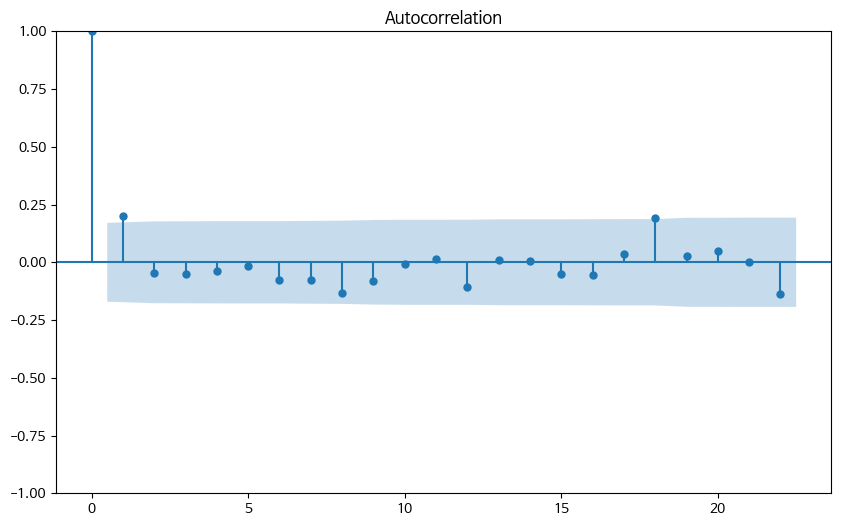

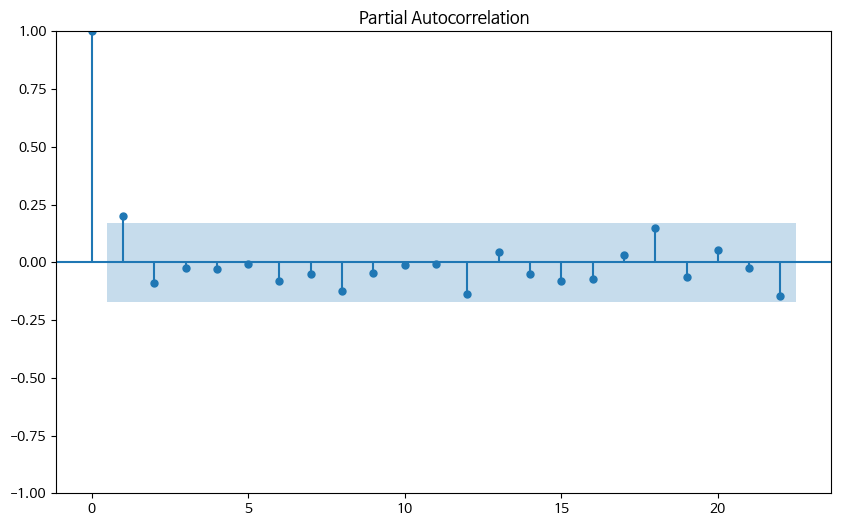

<class 'pandas.core.frame.DataFrame'>


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(logreturn['Close'])
plot_pacf(logreturn['Close']) #그림에서 절단이 일어나는 위치를 p의 값으로 지정, 24?
plt.show()
print(type(logreturn))

In [ ]:
#위에서 정의했던 make_sequence함수를 사용 가능
logr1=logreturn['Close'].values
print(type(logr1))
print(logr1.shape)
logr=logr1.reshape(1,-1)
print(logr.shape)
inte=13 #pacf의 p값
x=[]
y=[]
for i in range(logr.shape[1]):
    if i+inte>logr.shape[1]-1:
        break
    else:
         xx=logr[0,i:i+inte]
         x.append(xx)
         yy=logr[0,i+inte]
         y.append(yy)
print(type(x))
print(type(y))
x=np.array(x)
y=np.array(y)
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
x_train=x[:100]
x_test=x[100:]
y_train=y[:100]
y_test=y[100:]

<class 'numpy.ndarray'>
(132,)
(1, 132)
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(119, 13)
(119,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
from tensorflow.keras import regularizers
model=Sequential()
model.add(Dense(1,input_shape=(inte,))) #p=13, AR(13)모형과 동일, 13개의 x변수를 갖는 셈.
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)


Epoch 1/30
4/4 [==============================] - 0s 5ms/step - loss: 3.4177e-04 - mae: 0.0148
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 3.3505e-04 - mae: 0.0147
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 3.3335e-04 - mae: 0.0147
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 3.2904e-04 - mae: 0.0146
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 3.2427e-04 - mae: 0.0145
Epoch 6/30
4/4 [==============================] - 0s 3ms/step - loss: 3.2111e-04 - mae: 0.0144
Epoch 7/30
4/4 [==============================] - 0s 3ms/step - loss: 3.1738e-04 - mae: 0.0143
Epoch 8/30
4/4 [==============================] - 0s 4ms/step - loss: 3.1605e-04 - mae: 0.0143
Epoch 9/30
4/4 [==============================] - 0s 3ms/step - loss: 3.1269e-04 - mae: 0.0142
Epoch 10/30
4/4 [==============================] - 0s 3ms/step - loss: 3.1003e-04 - mae: 0.0142
Epoch 11/30
4/4 [==============================] 

In [ ]:
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

1/1 [==============================] - 0s 31ms/step - loss: 6.2255e-04 - mae: 0.0188
[0.00026269492809660733, 0.012773491442203522]
[0.0006225478136911988, 0.01876143366098404]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(inte,)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
4/4 [==============================] - 1s 4ms/step - loss: 2.1136e-04 - mae: 0.0111
Epoch 2/30
4/4 [==============================] - 0s 4ms/step - loss: 1.7569e-04 - mae: 0.0100
Epoch 3/30
4/4 [==============================] - 0s 3ms/step - loss: 1.6161e-04 - mae: 0.0097
Epoch 4/30
4/4 [==============================] - 0s 4ms/step - loss: 1.4774e-04 - mae: 0.0089
Epoch 5/30
4/4 [==============================] - 0s 4ms/step - loss: 1.5346e-04 - mae: 0.0092
Epoch 6/30
4/4 [==============================] - 0s 4ms/step - loss: 1.3028e-04 - mae: 0.0084
Epoch 7/30
4/4 [==============================] - 0s 4ms/step - loss: 1.2752e-04 - mae: 0.0087
Epoch 8/30
4/4 [==============================] - 0s 4ms/step - loss: 1.2090e-04 - mae: 0.0084
Epoch 9/30
4/4 [==============================] - 0s 4ms/step - loss: 1.1834e-04 - mae: 0.0082
Epoch 10/30
4/4 [==============================] - 0s 4ms/step - loss: 1.1810e-04 - mae: 0.0082
Epoch 11/30
4/4 [==============================] 

In [ ]:
#RNN을 위해서 shape변경
x_train=x_train.reshape(-1,13,1)    #210, 13, 1
x_test=x_test.reshape(-1,13,1)  #24, 13, 1

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GRU,LSTM  #(sample, timestep, features 형태의 데이터)
model=Sequential()
model.add(LSTM(32, input_shape=(1,inte)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

In [ ]:
model=Sequential()
model.add(GRU(32, input_shape=(1,inte)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

# 8. LSTM 활용

In [ ]:
!pip install scalecast

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

In [ ]:
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

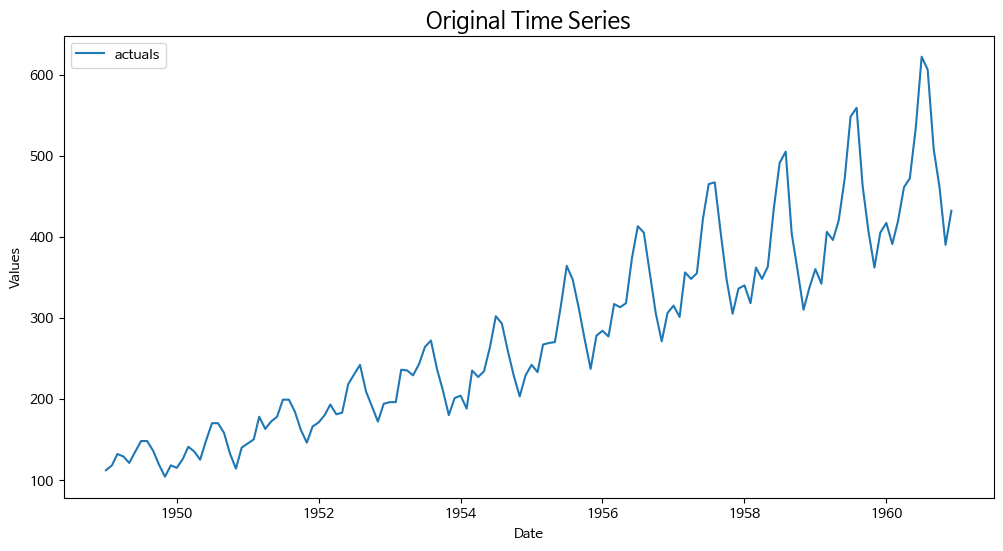

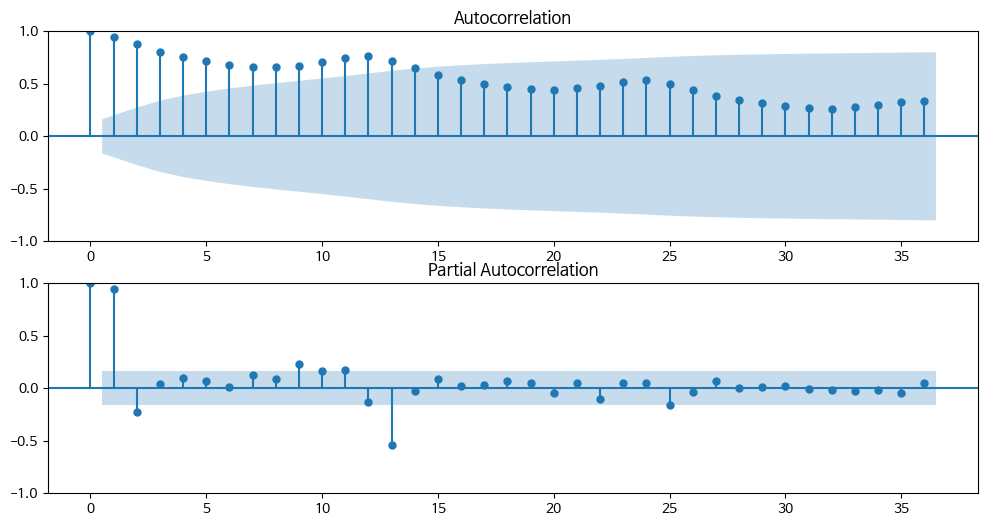

In [ ]:
# 승객 수 PLOT
# 승객 수 정상성 판단
# ACF PACF 그리기
# 25분까지

f = Forecaster(
    y=data['#Passengers'],
    current_dates=data['Month'],
    test_length = 12,
    future_dates = 12,
    cis = False,
)
f.plot()
plt.title('Original Time Series',size=16)
plt.show()

figs, axs = plt.subplots(2, 1,figsize=(12,6))
f.plot_acf(ax=axs[0],lags=36)
f.plot_pacf(ax=axs[1],lags=36)
plt.show()

## EDA

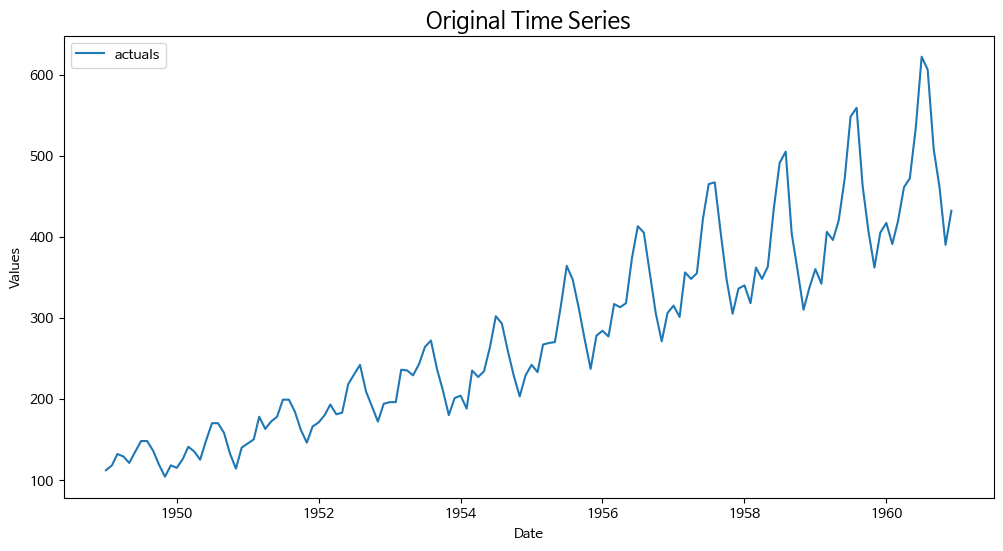

In [ ]:
f = Forecaster(
    y=data['#Passengers'],
    current_dates=data['Month'],
    test_length = 12,
    future_dates = 12,
    cis = False,
)
f.plot()
plt.title('Original Time Series',size=16)
plt.show()

In [ ]:
f

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=12
    Xvars=[]
    TestLength=12
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

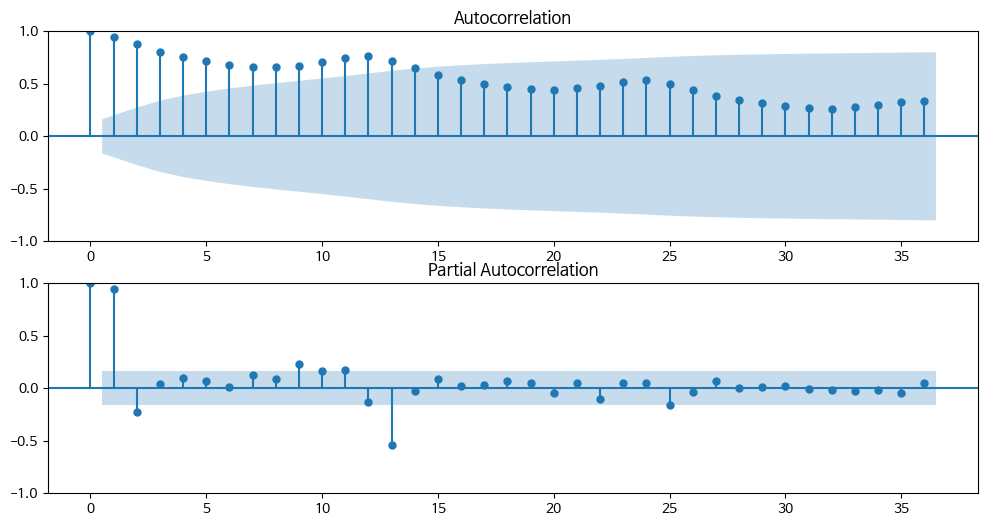

In [ ]:
figs, axs = plt.subplots(2, 1,figsize=(12,6))
f.plot_acf(ax=axs[0],lags=36)
f.plot_pacf(ax=axs[1],lags=36)
plt.show()

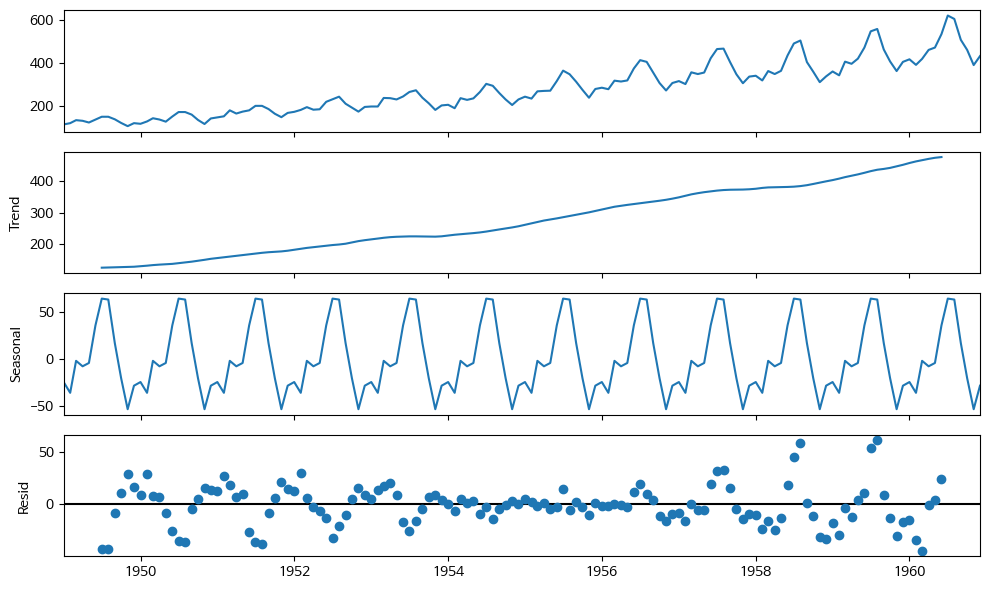

In [ ]:
plt.rc("figure",figsize=(10,6))
f.seasonal_decompose().plot()
plt.show()

ADF test: non-stationary.

In [ ]:
critical_pval = 0.05
print('-'*100)
print('Augmented Dickey-Fuller results:')
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print('the test-stat value is: {:.2f}'.format(stat))
print('the p-value is {:.4f}'.format(pval))
print('the series is {}'.format('stationary' if pval < critical_pval else 'not stationary'))
print('-'*100)

----------------------------------------------------------------------------------------------------
Augmented Dickey-Fuller results:
the test-stat value is: 0.82
the p-value is 0.9919
the series is not stationary
----------------------------------------------------------------------------------------------------


## LSTM Model

### Default parameters 모형

In [ ]:
f.set_estimator('lstm')
f.manual_forecast(call_me='lstm_default')

5/5 [==============================] - 0s 3ms/step


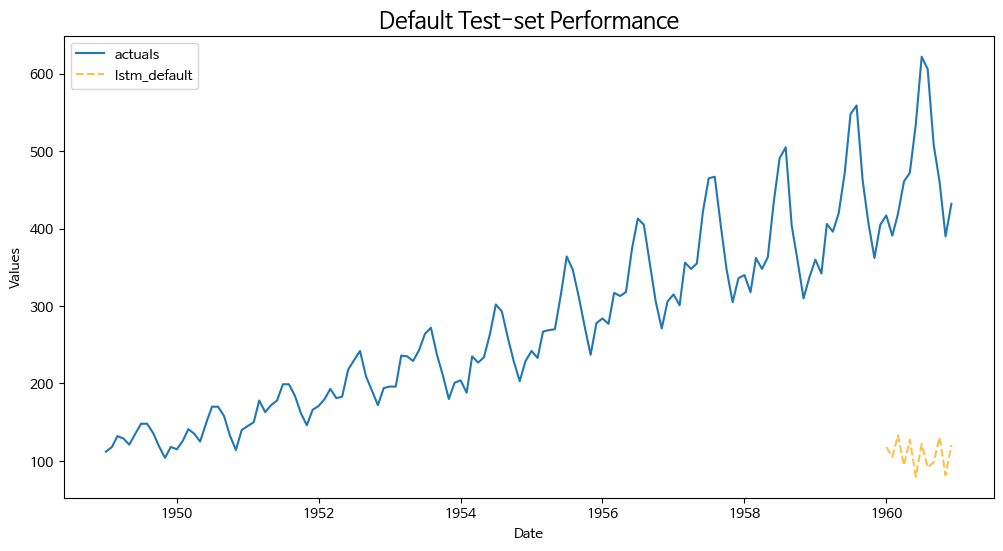

In [ ]:
f.plot_test_set()
plt.title('Default Test-set Performance',size=16)
plt.show()

lags 추가 모형 (2 years).

In [ ]:
f.manual_forecast(call_me='lstm_24lags',lags=24)

4/4 [==============================] - 0s 5ms/step


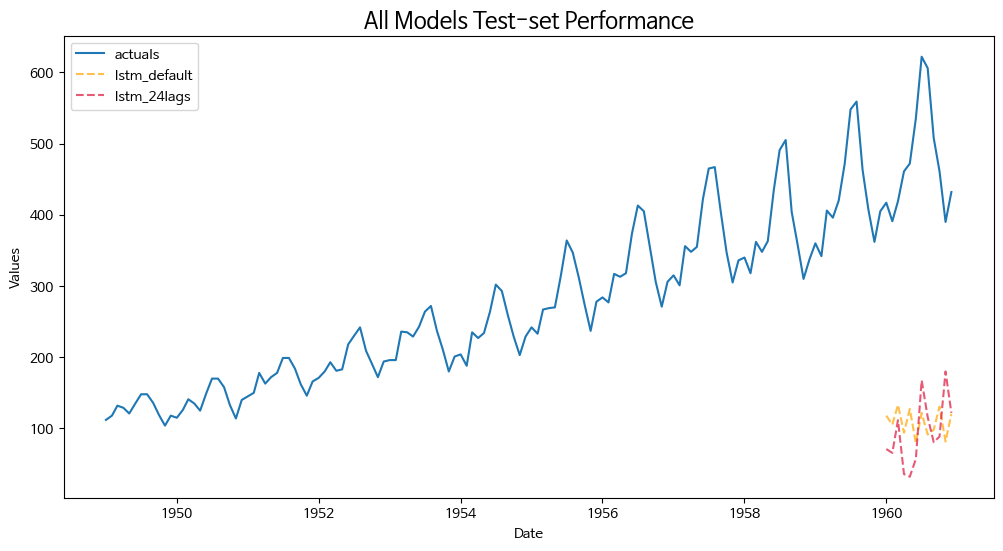

In [ ]:
f.plot_test_set()
plt.title('All Models Test-set Performance',size=16)
plt.show()

### epochs 추가 모형.

In [ ]:
f.manual_forecast(call_me='lstm_24lags_5epochs',lags=24,epochs=5,validation_split=.2,shuffle=True)

Epoch 1/5
3/3 [==============================] - 3s 305ms/step - loss: 0.3144 - val_loss: 0.5432
Epoch 2/5
3/3 [==============================] - 0s 28ms/step - loss: 0.3055 - val_loss: 0.5300
Epoch 3/5
3/3 [==============================] - 0s 28ms/step - loss: 0.2962 - val_loss: 0.5157
Epoch 4/5
3/3 [==============================] - 0s 30ms/step - loss: 0.2859 - val_loss: 0.5001
Epoch 5/5
1/1 [==============================] - 1s 684ms/step
Epoch 1/5
3/3 [==============================] - 4s 289ms/step - loss: 0.3404 - val_loss: 0.6462
Epoch 2/5
3/3 [==============================] - 0s 28ms/step - loss: 0.3343 - val_loss: 0.6380
Epoch 3/5
3/3 [==============================] - 0s 28ms/step - loss: 0.3281 - val_loss: 0.6298
Epoch 4/5
3/3 [==============================] - 0s 28ms/step - loss: 0.3219 - val_loss: 0.6214
Epoch 5/5
4/4 [==============================] - 0s 5ms/step


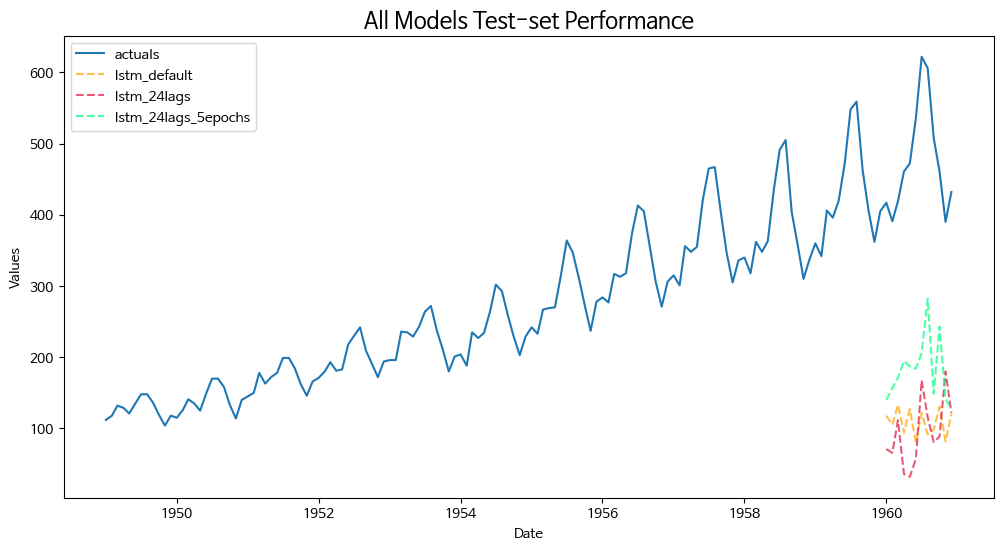

In [ ]:
f.plot_test_set()
plt.title('All Models Test-set Performance',size=16)
plt.show()

### layers and early stoping추가

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(
    call_me='lstm_24lags_earlystop_3layers',
    lags=24,
    epochs=25,
    validation_split=.2,
    shuffle=True,
    callbacks=EarlyStopping(
      monitor='val_loss',
      patience=5
    ),
    lstm_layer_sizes=(16,16,16),
    dropout=(0,0,0)
)

Epoch 1/25
3/3 [==============================] - 8s 900ms/step - loss: 0.3480 - val_loss: 0.6156
Epoch 2/25
3/3 [==============================] - 0s 55ms/step - loss: 0.3339 - val_loss: 0.5944
Epoch 3/25
3/3 [==============================] - 0s 60ms/step - loss: 0.3177 - val_loss: 0.5687
Epoch 4/25
3/3 [==============================] - 0s 57ms/step - loss: 0.2972 - val_loss: 0.5352
Epoch 5/25
3/3 [==============================] - 0s 62ms/step - loss: 0.2700 - val_loss: 0.4910
Epoch 6/25
3/3 [==============================] - 0s 55ms/step - loss: 0.2383 - val_loss: 0.4378
Epoch 7/25
3/3 [==============================] - 0s 57ms/step - loss: 0.2137 - val_loss: 0.3873
Epoch 8/25
3/3 [==============================] - 0s 59ms/step - loss: 0.1986 - val_loss: 0.3520
Epoch 9/25
3/3 [==============================] - 0s 60ms/step - loss: 0.1816 - val_loss: 0.3359
Epoch 10/25
3/3 [==============================] - 0s 54ms/step - loss: 0.1660 - val_loss: 0.3316
Epoch 11/25
3/3 [===========

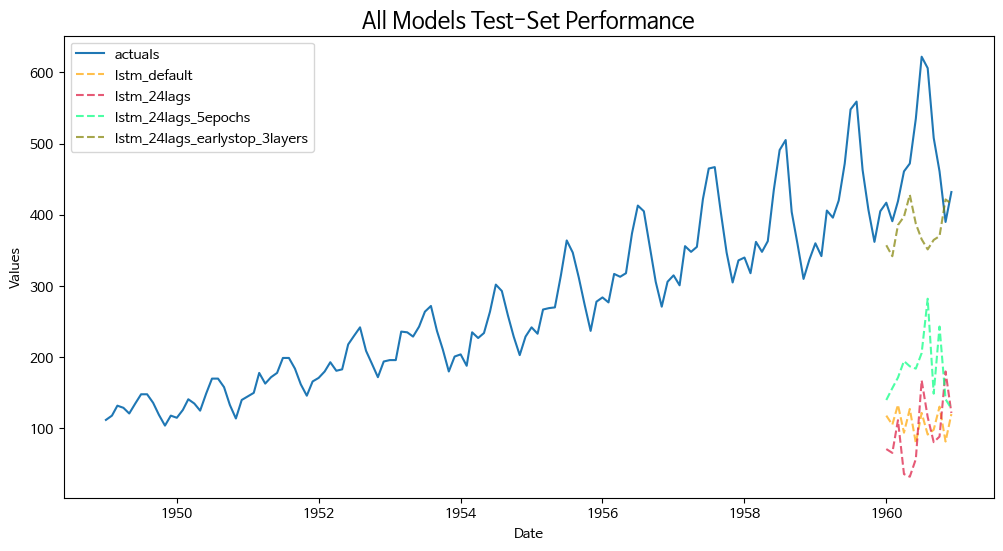

In [ ]:
f.plot_test_set()
plt.title('All Models Test-Set Performance',size=16)
plt.show()

### lags 추가 (3 years).

Epoch 1/15
3/3 [==============================] - 12s 960ms/step - loss: 0.3861 - val_loss: 0.5565
Epoch 2/15
3/3 [==============================] - 0s 141ms/step - loss: 0.3129 - val_loss: 0.2758
Epoch 3/15
3/3 [==============================] - 0s 129ms/step - loss: 0.1724 - val_loss: 0.1523
Epoch 4/15
3/3 [==============================] - 0s 125ms/step - loss: 0.1155 - val_loss: 0.2305
Epoch 5/15
3/3 [==============================] - 0s 130ms/step - loss: 0.1255 - val_loss: 0.2074
Epoch 6/15
3/3 [==============================] - 0s 128ms/step - loss: 0.1053 - val_loss: 0.1375
Epoch 7/15
3/3 [==============================] - 0s 125ms/step - loss: 0.1056 - val_loss: 0.1336
Epoch 8/15
3/3 [==============================] - 0s 126ms/step - loss: 0.0876 - val_loss: 0.1550
Epoch 9/15
3/3 [==============================] - 0s 123ms/step - loss: 0.0889 - val_loss: 0.1190
Epoch 10/15
3/3 [==============================] - 0s 130ms/step - loss: 0.0823 - val_loss: 0.1167
Epoch 11/15
3/3 [=

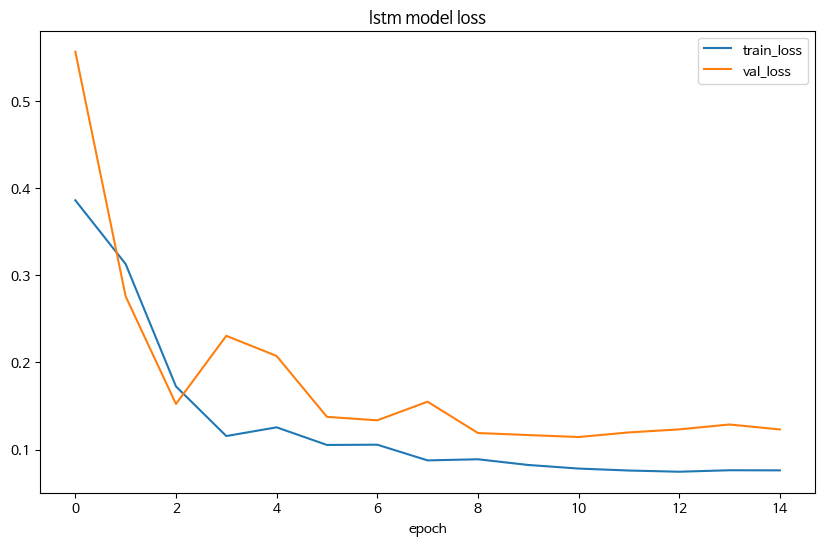

Epoch 1/15
3/3 [==============================] - 10s 963ms/step - loss: 0.3563 - val_loss: 0.5325
Epoch 2/15
3/3 [==============================] - 0s 140ms/step - loss: 0.2586 - val_loss: 0.2644
Epoch 3/15
3/3 [==============================] - 1s 214ms/step - loss: 0.1600 - val_loss: 0.1599
Epoch 4/15
3/3 [==============================] - 1s 224ms/step - loss: 0.1001 - val_loss: 0.2312
Epoch 5/15
3/3 [==============================] - 1s 215ms/step - loss: 0.0998 - val_loss: 0.1541
Epoch 6/15
3/3 [==============================] - 1s 160ms/step - loss: 0.0926 - val_loss: 0.1274
Epoch 7/15
3/3 [==============================] - 0s 127ms/step - loss: 0.0819 - val_loss: 0.1621
Epoch 8/15
3/3 [==============================] - 0s 115ms/step - loss: 0.0780 - val_loss: 0.1236
Epoch 9/15
3/3 [==============================] - 0s 121ms/step - loss: 0.0718 - val_loss: 0.1127
Epoch 10/15
3/3 [==============================] - 0s 121ms/step - loss: 0.0717 - val_loss: 0.1257
Epoch 11/15
3/3 [=

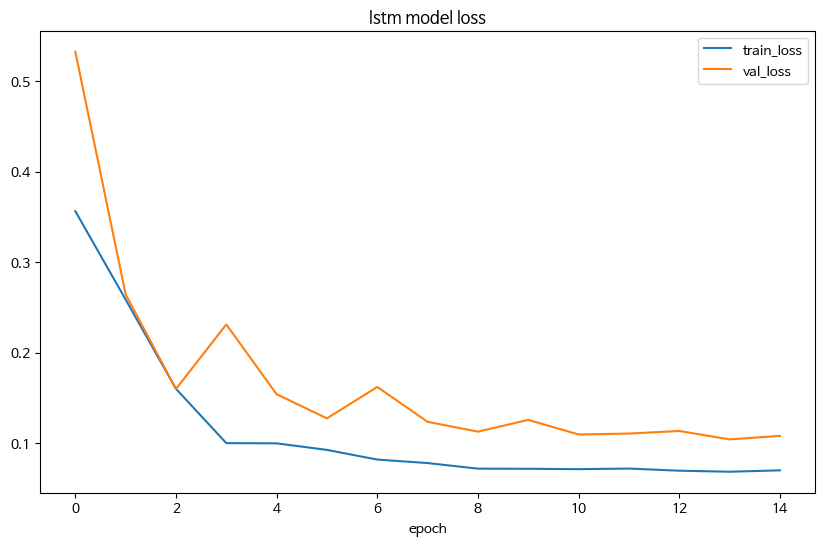

In [ ]:
f.manual_forecast(
    call_me='lstm_24lags_4layers_15epochs',
    lags=36,
    batch_size=32,
    epochs=15,
    validation_split=.2,
    shuffle=True,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(72,)*4,
    dropout=(0,)*4,
    plot_loss=True
)

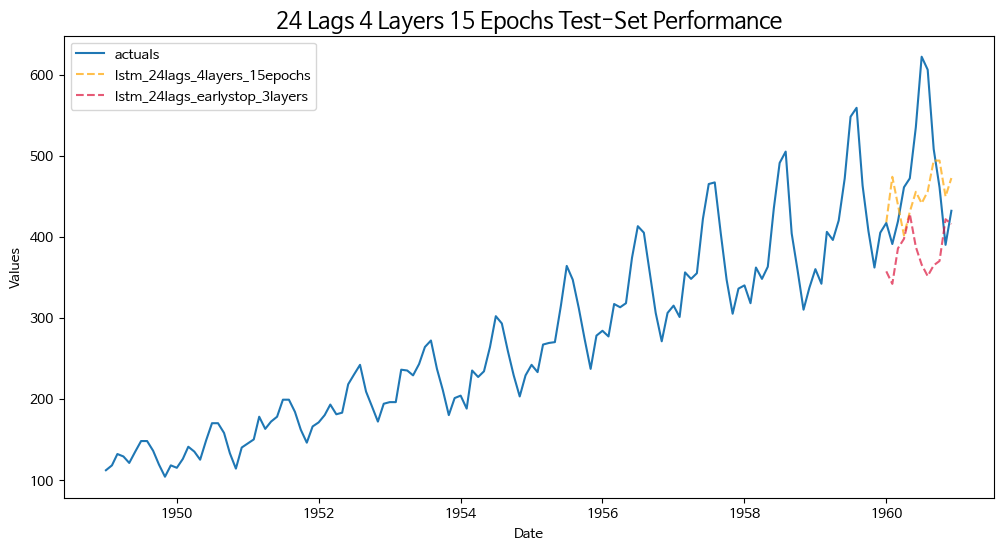

In [ ]:
f.plot_test_set(order_by='TestSetMAPE',models='top_2')
plt.title('24 Lags 4 Layers 15 Epochs Test-Set Performance',size=16)
plt.show()



### more layers (15), epochs (300) 추가

Epoch 1/300
5/5 [==============================] - 41s 2s/step - loss: 0.3614 - val_loss: 0.2329
Epoch 2/300
5/5 [==============================] - 2s 430ms/step - loss: 0.1669 - val_loss: 0.3360
Epoch 3/300
5/5 [==============================] - 2s 426ms/step - loss: 0.1422 - val_loss: 0.2348
Epoch 4/300
5/5 [==============================] - 3s 671ms/step - loss: 0.1286 - val_loss: 0.2600
Epoch 5/300
5/5 [==============================] - 2s 418ms/step - loss: 0.1221 - val_loss: 0.2391
Epoch 6/300
5/5 [==============================] - 2s 469ms/step - loss: 0.1092 - val_loss: 0.1988
Epoch 7/300
5/5 [==============================] - 2s 418ms/step - loss: 0.0894 - val_loss: 0.1165
Epoch 8/300
5/5 [==============================] - 2s 418ms/step - loss: 0.0847 - val_loss: 0.1258
Epoch 9/300
5/5 [==============================] - 3s 556ms/step - loss: 0.0889 - val_loss: 0.1195
Epoch 10/300
5/5 [==============================] - 3s 451ms/step - loss: 0.0769 - val_loss: 0.1153
Epoch 11/30

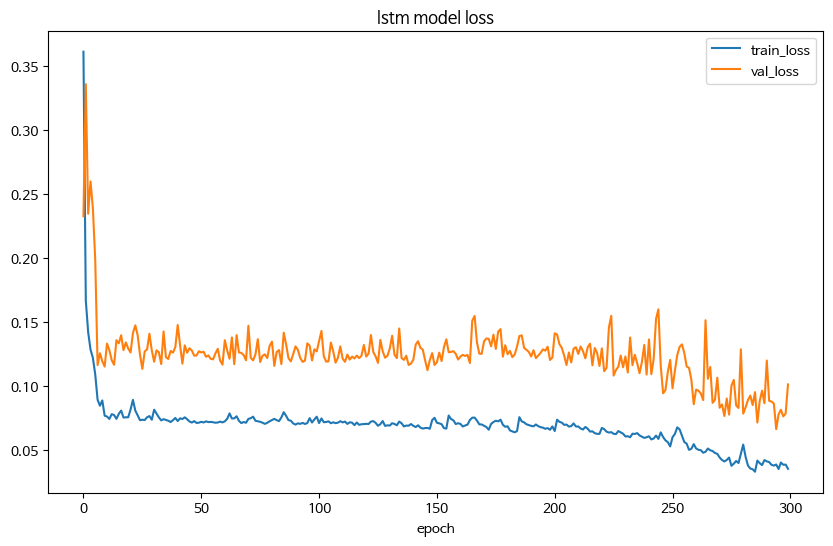

Epoch 1/300
5/5 [==============================] - 42s 2s/step - loss: 0.3208 - val_loss: 0.2333
Epoch 2/300
5/5 [==============================] - 3s 596ms/step - loss: 0.1371 - val_loss: 0.3550
Epoch 3/300
5/5 [==============================] - 2s 445ms/step - loss: 0.1400 - val_loss: 0.2312
Epoch 4/300
5/5 [==============================] - 2s 451ms/step - loss: 0.1281 - val_loss: 0.3248
Epoch 5/300
5/5 [==============================] - 2s 445ms/step - loss: 0.1216 - val_loss: 0.2553
Epoch 6/300
5/5 [==============================] - 2s 438ms/step - loss: 0.0929 - val_loss: 0.1567
Epoch 7/300
5/5 [==============================] - 3s 685ms/step - loss: 0.0780 - val_loss: 0.1883
Epoch 8/300
5/5 [==============================] - 2s 455ms/step - loss: 0.0797 - val_loss: 0.1581
Epoch 9/300
5/5 [==============================] - 2s 439ms/step - loss: 0.0737 - val_loss: 0.1352
Epoch 10/300
5/5 [==============================] - 2s 449ms/step - loss: 0.0787 - val_loss: 0.2117
Epoch 11/30

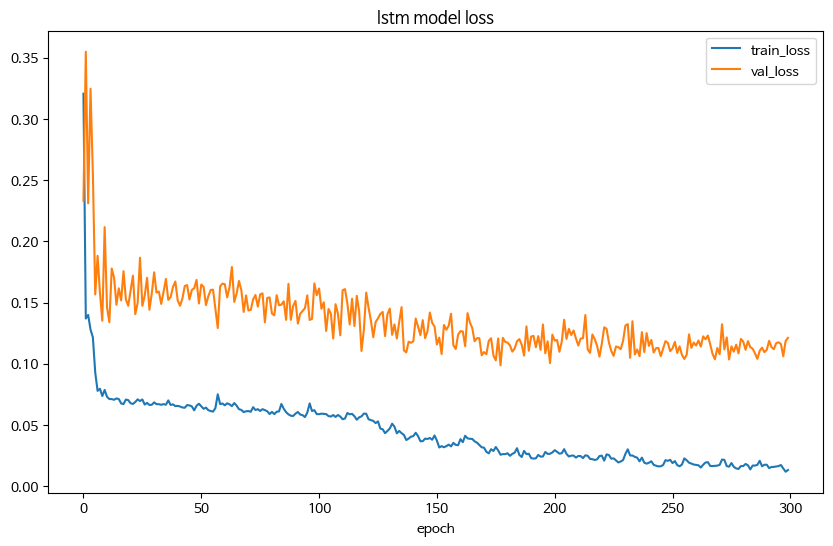

In [ ]:
f.manual_forecast(
    call_me='lstm_best',
    lags=36,
    batch_size=16,
    epochs=300,
    validation_split=.2,
    shuffle=True,
    activation='tanh',
    optimizer='Adam',
    learning_rate=0.001,
    lstm_layer_sizes=(100,)*15,
    dropout=(0,)*15,
    plot_loss=True,
)

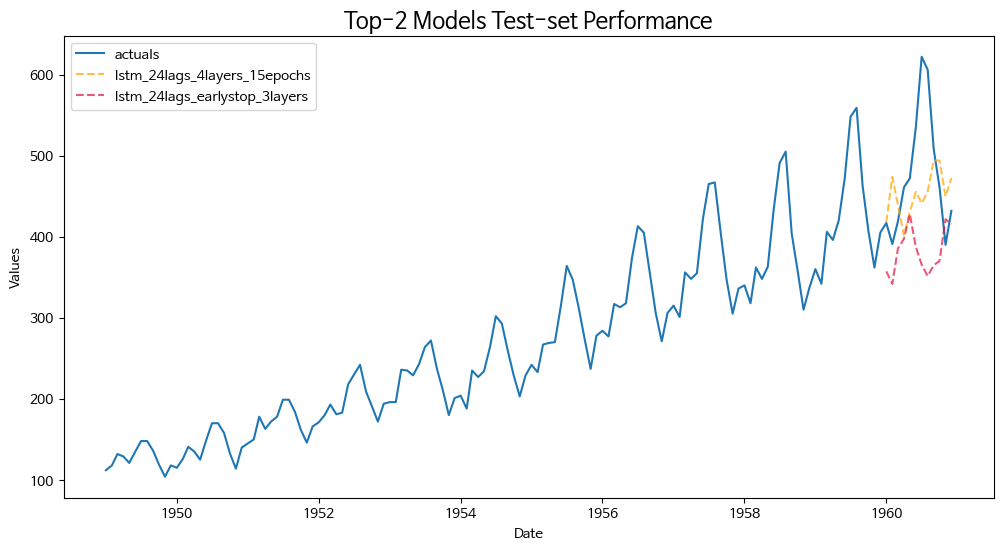

In [ ]:
f.plot_test_set(order_by='TestSetMAPE',models='top_2')
plt.title('Top-2 Models Test-set Performance',size=16)
plt.show()

## 다중선형회귀와의 비교
- lags (24): X변수로 추가됨
- 계절 요인 추가 (month, quarter - using dummy vars)
- 연도 및 트렌드 추가
- 차분

In [ ]:
from scalecast.SeriesTransformer import SeriesTransformer

transformer = SeriesTransformer(f,deepcopy=False)
f = transformer.DiffTransform()

f.add_ar_terms(24)
f.add_seasonal_regressors('month','quarter',dummy=True)
f.add_seasonal_regressors('year')
f.add_time_trend()

## MLR Modeling

In [ ]:
f.set_estimator('mlr')
f.manual_forecast()

In [ ]:
f = transformer.DiffRevert(
    exclude_models = [m for m in f.history if m != 'mlr']
)

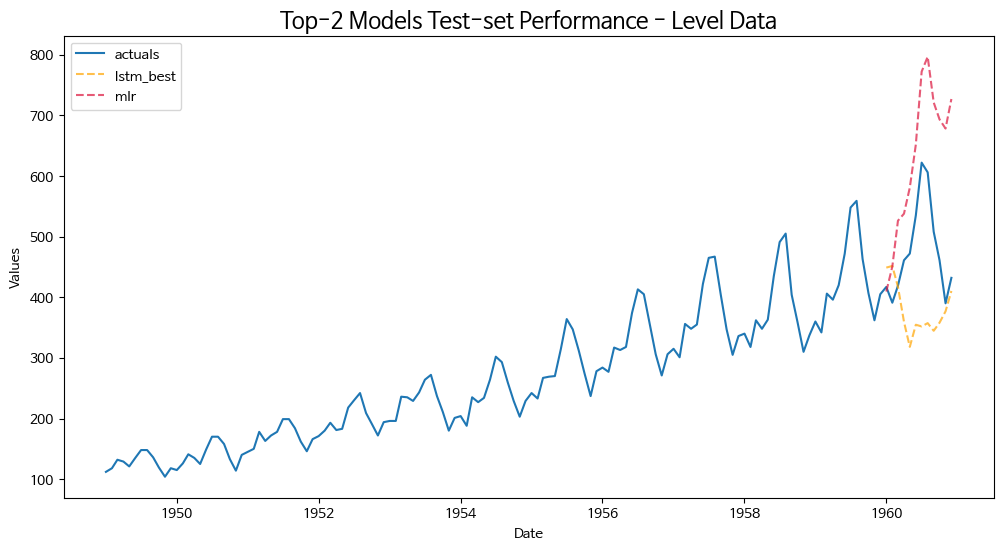

In [ ]:
f.plot_test_set(order_by='TestSetMAPE',models=['lstm_best','mlr'])
plt.title('Top-2 Models Test-set Performance - Level Data',size=16)
plt.show()

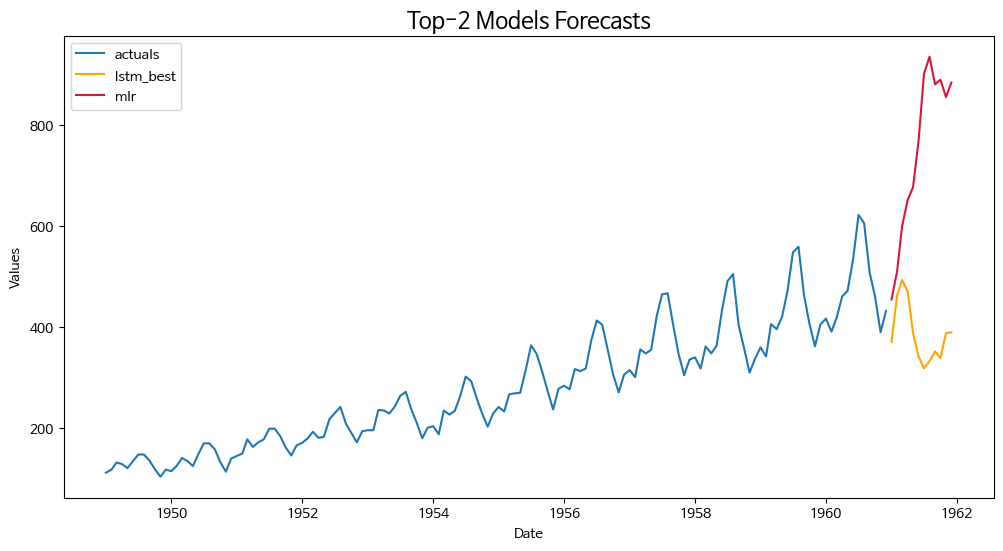

In [ ]:
f.plot(order_by='TestSetMAPE',models=['lstm_best','mlr'])
plt.title('Top-2 Models Forecasts',size=16)
plt.show()

## Benchmarking

In [ ]:
f.export('model_summaries',determine_best_by='TestSetMAPE')[
    ['ModelNickname','TestSetMAPE','TestSetRMSE','TestSetR2','best_model']
]

,ModelNickname,TestSetMAPE,TestSetRMSE,TestSetR2,best_model
0,lstm_24lags_4layers_15epochs,0.125907,81.935707,-0.211931,True
1,lstm_24lags_earlystop_3layers,0.190475,127.613232,-1.939835,False
2,lstm_best,0.216012,142.568030,-2.669238,False
3,mlr,0.328659,176.765019,-4.640586,False
4,lstm_24lags_5epochs,0.618121,299.616494,-15.205523,False
5,lstm_default,0.766333,376.141842,-24.540824,False
6,lstm_24lags,0.798933,390.592777,-26.541020,False


## Export Results

### Export forecasts

In [ ]:
results = f.export(['lvl_fcsts','lvl_test_set_predictions'],models=['mlr','lstm_best'])
results['lvl_fcsts']

,DATE,mlr,lstm_best
0,1961-01-01,454.816563,370.527622
1,1961-02-01,510.285993,462.866657
2,1961-03-01,599.586514,493.307819
3,1961-04-01,651.676245,470.740668
4,1961-05-01,676.771160,388.536080
5,1961-06-01,768.929678,341.931763
6,1961-07-01,901.142287,318.643660
7,1961-08-01,935.110153,332.656064
8,1961-09-01,880.271272,352.006883
9,1961-10-01,889.560092,338.789254


### Export test-set preds

In [ ]:
results['lvl_test_set_predictions']

,DATE,actual,mlr,lstm_best
0,1960-01-01,417.0,409.396729,448.896001
1,1960-02-01,391.0,450.605957,451.618399
2,1960-03-01,419.0,526.268311,417.290709
3,1960-04-01,461.0,537.813477,359.501219
4,1960-05-01,472.0,580.850830,318.157338
5,1960-06-01,535.0,651.786621,354.681975
6,1960-07-01,622.0,772.128662,351.860723
7,1960-08-01,606.0,796.705078,357.326647
8,1960-09-01,508.0,721.250244,344.678422
9,1960-10-01,461.0,693.350098,358.049425


### Export Feature Info
- For MLR only

In [ ]:
f.save_feature_importance()
f.export_feature_importance('mlr')

,weight,std
feature,,
AR34,0.681610,0.034564
AR28,0.439113,0.059944
AR31,0.385647,0.079804
year,0.305806,0.010041
t,0.256844,0.021482
AR36,0.201283,0.007572
AR11,0.138667,0.033615
AR22,0.115765,0.012296
AR10,0.108895,0.036866
